# **Coffee Shop Sale**

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')

1. Data Cleaning:

Reviewing the dataset

In [3]:
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


Identifying and removing any inconsistencies, missing values, or duplicates

In [4]:
# summary statistics for numerical columns (used to check inconsistent values)
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [5]:
# Checking for null values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
# Checking for duplicated values
df.duplicated().sum()

0

Ensure data integrity and consistency

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Converting to the 'category' type to optimize memory usage and improve performance.

In [8]:
df['store_location'] = df['store_location'].astype('category')
df['product_category'] = df['product_category'].astype('category')
df['product_type'] = df['product_type'].astype('category')
df['product_detail'] = df['product_detail'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  category      
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  category      
 9   product_type      149116 non-null  category      
 10  product_detail    149116 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 8.5+ MB


Formatting the 'transaction_time' column

In [9]:
# Convert 'transaction_time' to proper time format
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time

Formatting the object type columns

In [10]:
# Convert all non-string values in object columns to strings
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)

# Strip leading/trailing spaces from object type columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  category      
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  category      
 9   product_type      149116 non-null  category      
 10  product_detail    149116 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 8.5+ MB


2. Profit/Loss Analysis:

 Calculating the 'sales' for each transaction by multiplying the 'transaction_qty' by the 'unit_price'.

In [12]:
df['sales'] = df['transaction_qty'] * df['unit_price']
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


'data' contains the total transaction_qty, mean 'unit_price', total 'sales', and the corresponding product categories and types for each product detail.

In [ ]:
# Save the cleaned dataset for further analysis
df.to_excel("Cleaned_Coffee_Shop_Sales.xlsx", index=False)

In [13]:
# Group by product_detail, product_category, and product_type to get total sales and profit
data = df.groupby('product_detail').agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',
    'sales': 'sum',
    'product_category': 'first',
    'product_type': 'first'
}).reset_index()

data

,product_detail,transaction_qty,unit_price,sales,product_category,product_type
0,Almond Croissant,1911,3.750988,7168.13,Bakery,Pastry
1,Brazilian - Organic,214,18.000000,3852.00,Coffee beans,Organic Beans
2,Brazilian Lg,4317,3.500000,15109.50,Coffee,Organic brewed coffee
3,Brazilian Rg,4385,3.000000,13155.00,Coffee,Organic brewed coffee
4,Brazilian Sm,4310,2.200000,9482.00,Coffee,Organic brewed coffee
...,...,...,...,...,...,...
75,Sustainably Grown Organic Lg,4453,4.750000,21151.75,Drinking Chocolate,Hot chocolate
76,Sustainably Grown Organic Rg,4329,3.750000,16233.75,Drinking Chocolate,Hot chocolate
77,Traditional Blend Chai,153,8.950000,1369.35,Loose Tea,Chai tea
78,Traditional Blend Chai Lg,4174,3.000000,12522.00,Tea,Brewed Chai tea


'estimated_cost_price' column is added that contains the average unit price for each product type.

In [14]:
category_costs = data.groupby('product_type')['unit_price'].mean()
data['estimated_cost_price'] = data['product_type'].map(category_costs)

data

,product_detail,transaction_qty,unit_price,sales,product_category,product_type,estimated_cost_price
0,Almond Croissant,1911,3.750988,7168.13,Bakery,Pastry,3.672673
1,Brazilian - Organic,214,18.000000,3852.00,Coffee beans,Organic Beans,20.304612
2,Brazilian Lg,4317,3.500000,15109.50,Coffee,Organic brewed coffee,2.900000
3,Brazilian Rg,4385,3.000000,13155.00,Coffee,Organic brewed coffee,2.900000
4,Brazilian Sm,4310,2.200000,9482.00,Coffee,Organic brewed coffee,2.900000
...,...,...,...,...,...,...,...
75,Sustainably Grown Organic Lg,4453,4.750000,21151.75,Drinking Chocolate,Hot chocolate,4.125000
76,Sustainably Grown Organic Rg,4329,3.750000,16233.75,Drinking Chocolate,Hot chocolate,4.125000
77,Traditional Blend Chai,153,8.950000,1369.35,Loose Tea,Chai tea,9.800000
78,Traditional Blend Chai Lg,4174,3.000000,12522.00,Tea,Brewed Chai tea,2.941667


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   product_detail        80 non-null     category
 1   transaction_qty       80 non-null     int64   
 2   unit_price            80 non-null     float64 
 3   sales                 80 non-null     float64 
 4   product_category      80 non-null     category
 5   product_type          80 non-null     category
 6   estimated_cost_price  80 non-null     float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 7.2 KB


calculating the profit or loss for each product detail by subtracting the total estimated cost from the total sales (This is not the actual profit and loss, it is just assumptions).

In [16]:
data['profit_loss'] = data['sales'] - data['transaction_qty'] * data['estimated_cost_price']

data

,product_detail,transaction_qty,unit_price,sales,product_category,product_type,estimated_cost_price,profit_loss
0,Almond Croissant,1911,3.750988,7168.13,Bakery,Pastry,3.672673,149.651581
1,Brazilian - Organic,214,18.000000,3852.00,Coffee beans,Organic Beans,20.304612,-493.186893
2,Brazilian Lg,4317,3.500000,15109.50,Coffee,Organic brewed coffee,2.900000,2590.200000
3,Brazilian Rg,4385,3.000000,13155.00,Coffee,Organic brewed coffee,2.900000,438.500000
4,Brazilian Sm,4310,2.200000,9482.00,Coffee,Organic brewed coffee,2.900000,-3017.000000
...,...,...,...,...,...,...,...,...
75,Sustainably Grown Organic Lg,4453,4.750000,21151.75,Drinking Chocolate,Hot chocolate,4.125000,2783.125000
76,Sustainably Grown Organic Rg,4329,3.750000,16233.75,Drinking Chocolate,Hot chocolate,4.125000,-1623.375000
77,Traditional Blend Chai,153,8.950000,1369.35,Loose Tea,Chai tea,9.800000,-130.050000
78,Traditional Blend Chai Lg,4174,3.000000,12522.00,Tea,Brewed Chai tea,2.941667,243.483333


Numbers of Products by Product Category, to see which product category is has most number of orders.

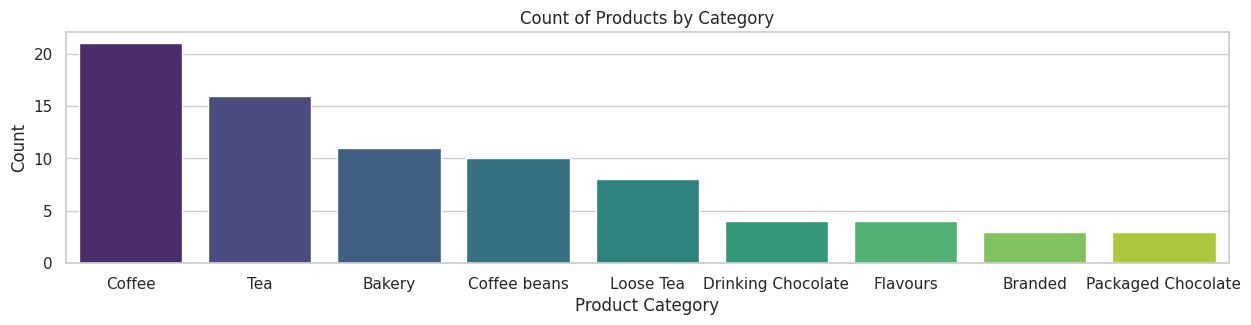

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Calculate the value counts and get the categories in descending order
category_order = data['product_category'].value_counts().index

# Create the count plot with categories sorted in descending order
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x='product_category', palette='viridis', order=category_order)
plt.title('Count of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


Sales of Products by Product Category, to see which product category is has most number of Sales

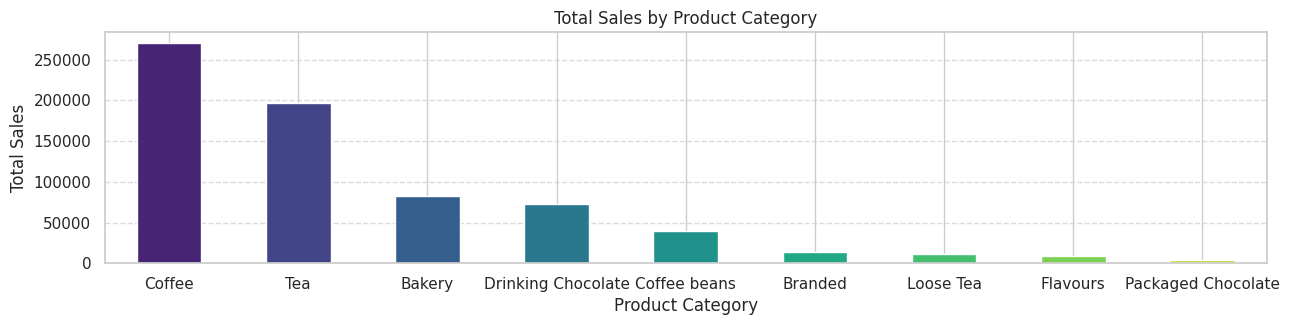

In [18]:
# Group by product category and calculate total sales
sales_by_category = df.groupby('product_category')['sales'].sum()

# Sort the sales values in descending order
sales_by_category = sales_by_category.sort_values(ascending=False)

colors = sns.color_palette('viridis', len(sales_by_category))

# Create a bar chart
plt.figure(figsize=(15, 3))
sales_by_category.plot(kind='bar', color=colors)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

PnL of Products by Product Category, to see which product category is has most number of Profit or Loss.

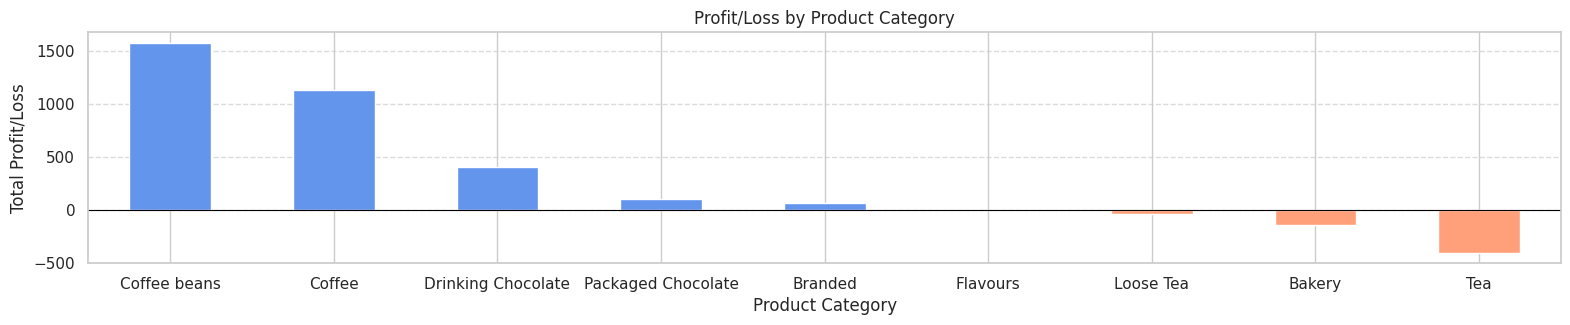

In [19]:
import matplotlib.pyplot as plt

# Group by product category and calculate total profit/loss
profit_loss_by_category = data.groupby('product_category')['profit_loss'].sum()

# Sort the profit/loss values in descending order
profit_loss_by_category = profit_loss_by_category.sort_values(ascending=False)

# Define colors based on profit/loss values
colors = ['cornflowerblue' if value > 0 else 'lightsalmon' for value in profit_loss_by_category]

# Create a bar chart
plt.figure(figsize=(19, 3))
profit_loss_by_category.plot(kind='bar', color=colors)
plt.title('Profit/Loss by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit/Loss')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Draw a horizontal line at 0
plt.axhline(0, color='black', linewidth=0.8)

plt.show()


Analyzing top Profit making Product_Types

In [20]:
import pandas as pd

# Group by product_type to get total profit_loss
product_type_summary = data.groupby('product_type')['sales'].sum().reset_index()

# Sort by profit_loss in descending order and select top 10
top_profit_types = product_type_summary.sort_values(by='sales', ascending=False).head(10)

# Display the top 10 profit-making product types
print(top_profit_types)


             product_type     sales
0        Barista Espresso  91406.20
4         Brewed Chai tea  77081.95
17          Hot chocolate  72416.00
13  Gourmet brewed coffee  70034.60
3        Brewed Black tea  47932.00
6       Brewed herbal tea  47539.50
25  Premium brewed coffee  38781.15
22  Organic brewed coffee  37746.50
27                  Scone  36866.12
10            Drip coffee  31984.00


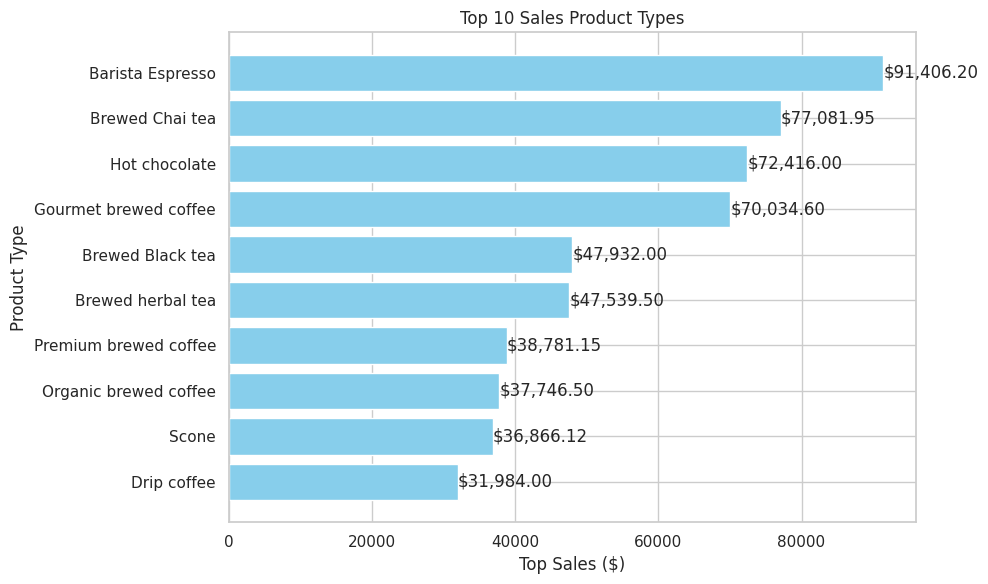

In [21]:
# Sort by sales in descending order and select top 10
top_sales_types = product_type_summary.sort_values(by='sales', ascending=False).head(10)

# Data for plotting
product_types = top_sales_types['product_type']
saless = top_sales_types['sales']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(product_types, saless, color='skyblue')

# Adding labels to bars
for bar, profit_loss in zip(bars, saless):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'${profit_loss:,.2f}', va='center')

# Customize plot labels and title
plt.xlabel('Top Sales ($)')
plt.ylabel('Product Type')
plt.title('Top 10 Sales Product Types')

# Invert y-axis to show highest profit at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()


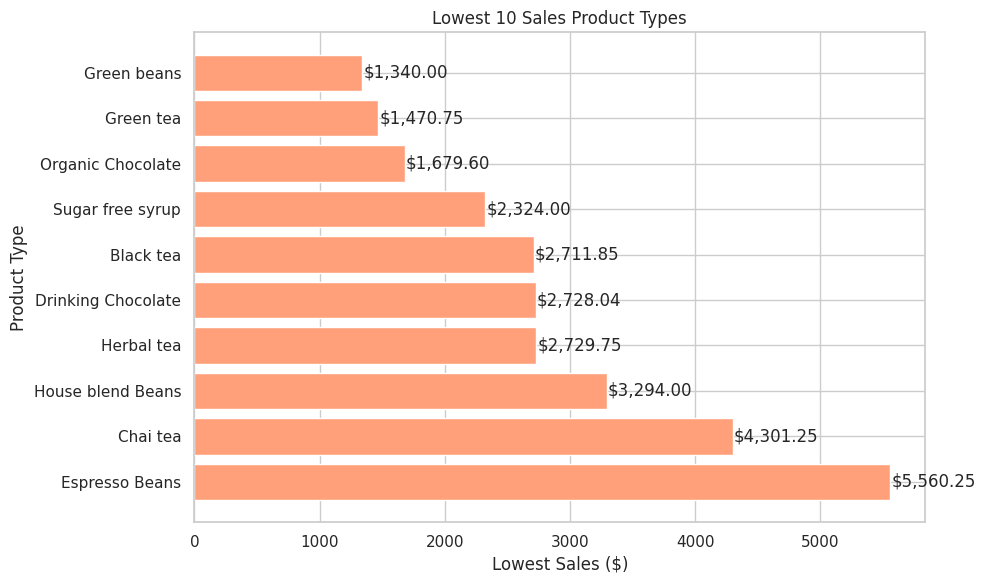

In [22]:
# Sort by sales in descending order and select top 10
low_sales_types = product_type_summary.sort_values(by='sales', ascending=True).head(10)

# Data for plotting
product_types = low_sales_types['product_type']
saless = low_sales_types['sales']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(product_types, saless, color='lightsalmon')

# Adding labels to bars
for bar, profit_loss in zip(bars, saless):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'${profit_loss:,.2f}', va='center')

# Customize plot labels and title
plt.xlabel('Lowest Sales ($)')
plt.ylabel('Product Type')
plt.title('Lowest 10 Sales Product Types')

# Invert y-axis to show highest profit at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()


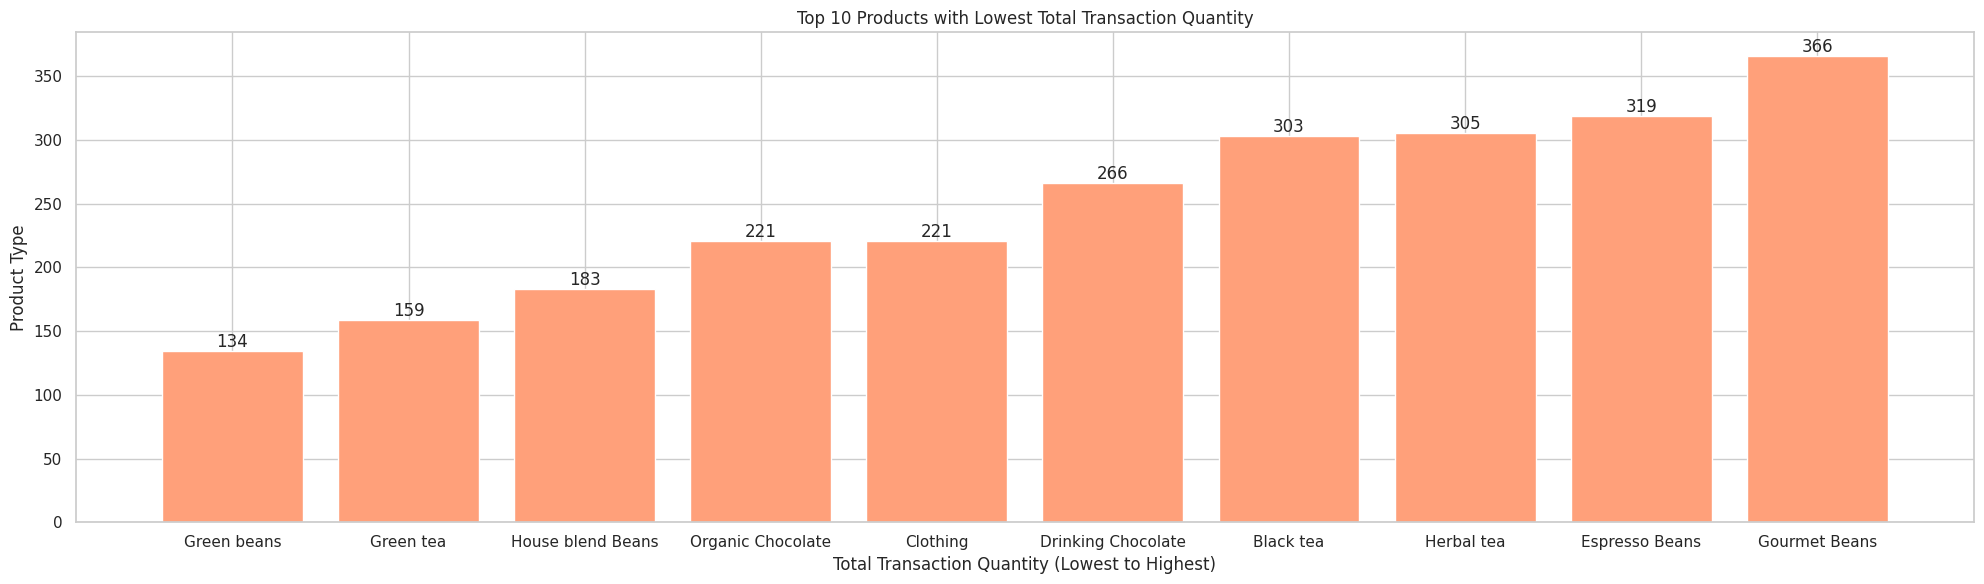

In [29]:
# Group data by product_type and calculate total transaction quantity
product_sales = df.groupby('product_type')['transaction_qty'].sum()

# Sort by transaction_qty in ascending order (lowest to highest) and select top 10
low_sales_types = product_sales.sort_values(ascending=True).head(10)

# Extract product_type and total transaction quantity for plotting
product_types = low_sales_types.index.to_list()  # Get product types as list
sales_qty = low_sales_types.to_list()  # Get total transaction quantity as list

# Create a bar chart (horizontal bars)
plt.figure(figsize=(20, 6))
bars = plt.bar(product_types, sales_qty, color='lightsalmon')

# Add labels above bars (alternative method using plt.bar_label)
plt.bar_label(bars)  # Automatically adds labels above each bar

# Customize plot labels and title
plt.xlabel('Total Transaction Quantity (Lowest to Highest)')
plt.ylabel('Product Type')
plt.title('Top 10 Products with Lowest Total Transaction Quantity')

# Display the plot
plt.tight_layout()
plt.show()


Analyzing top Loss making Product_Types



In [ ]:
import pandas as pd

# Group by product_type to get total profit_loss
product_type_summary = data.groupby('product_type')['profit_loss'].sum().reset_index()

# Sort by profit_loss in descending order and select top 10
top_loss_types = product_type_summary.sort_values(by='profit_loss', ascending=True).head(10)

# Display the top 10 profit-making product types
print(top_loss_types)


             product_type  profit_loss
10            Drip coffee  -243.500000
27                  Scone  -206.785900
4         Brewed Chai tea  -136.800000
6       Brewed herbal tea  -112.500000
13  Gourmet brewed coffee   -92.500000
3        Brewed Black tea   -88.500000
5        Brewed Green tea   -64.250000
11         Espresso Beans   -54.150000
7                Chai tea   -40.150000
1                Biscotti   -24.985404


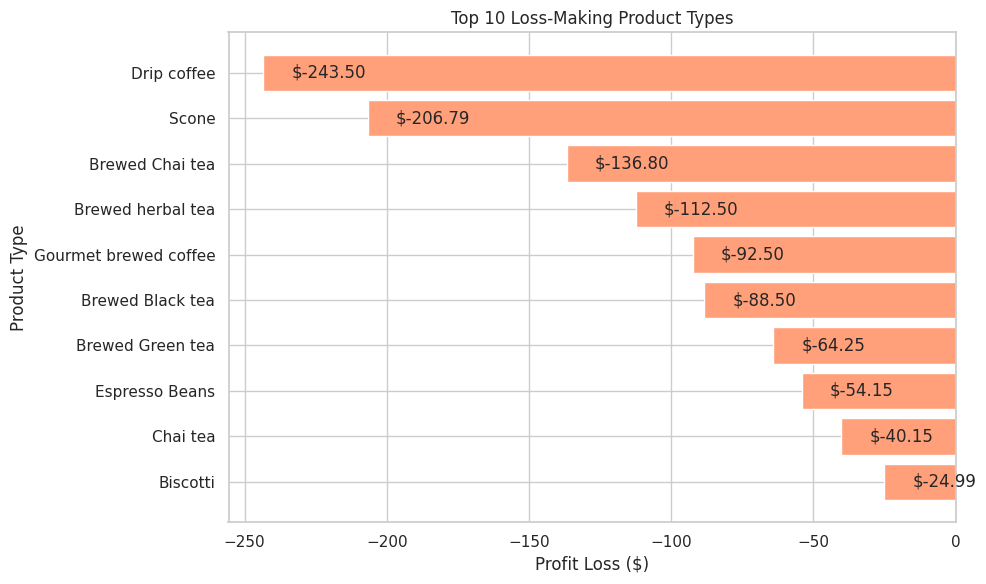

In [ ]:
# Sort by profit_loss in descending order and select top 10
top_loss_types = product_type_summary.sort_values(by='profit_loss', ascending=True).head(10)

# Data for plotting
product_types = top_loss_types['product_type']
profit_losses = top_loss_types['profit_loss']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(product_types, profit_losses, color='lightsalmon')

# Adding labels to bars
for bar, profit_loss in zip(bars, profit_losses):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'${profit_loss:,.2f}', va='center')

# Customize plot labels and title
plt.xlabel('Profit Loss ($)')
plt.ylabel('Product Type')
plt.title('Top 10 Loss-Making Product Types')

# Invert y-axis to show highest profit at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()


In [30]:
category_costs = df.groupby('product_type')['unit_price'].mean()
df['estimated_cost_price'] = df['product_type'].map(category_costs)

df['profit_loss'] = df['sales'] - df['transaction_qty'] * df['estimated_cost_price']

df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,estimated_cost_price,profit_loss
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2.696641,0.606717
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2.936993,0.326014
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,4.148827,0.702346
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2.484959,-0.484959
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2.936993,0.326014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2.744731,-0.489462
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2.744670,0.510661
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2.744731,0.255269
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,3.655200,0.094800


Visualizing Total Sales VS Profit Loss on Monthly basis.

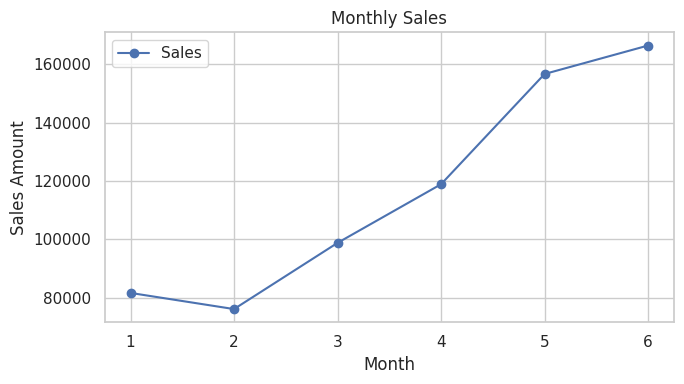

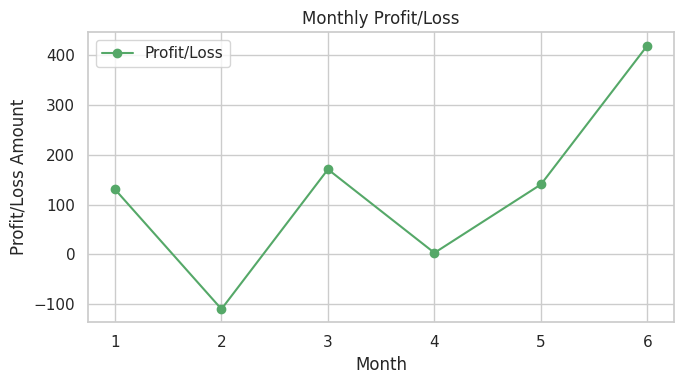

In [31]:
# Extract month from transaction_date
df['month'] = df['transaction_date'].dt.month

# Aggregate sales and profit_loss by month
monthly_data = df.groupby('month').agg({'sales': 'sum', 'profit_loss': 'sum'}).reset_index()

# Plotting Sales
plt.figure(figsize=(7, 4))
plt.plot(monthly_data['month'], monthly_data['sales'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Profit/Loss
plt.figure(figsize=(7, 4))
plt.plot(monthly_data['month'], monthly_data['profit_loss'], marker='o', linestyle='-', color='g', label='Profit/Loss')
plt.title('Monthly Profit/Loss')
plt.xlabel('Month')
plt.ylabel('Profit/Loss Amount')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The graph suggests that the company’s sales are increasing while its profit or loss is more variable.

**Using Statsmodels to visualize graph of sales and profit & loss.**

Visualizing the sales

In [32]:
import statsmodels.api as sm

In [33]:
# Assuming the date column is named 'transaction_date' (or replace it with the correct one)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

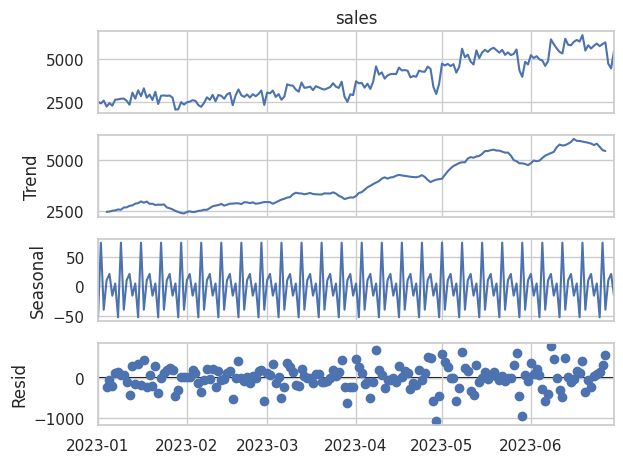

In [34]:
# Aggregate total sales by day for time series analysis
daily_sales = df.set_index('transaction_date').resample('D')['sales'].sum()

# Fill missing days with 0 sales
daily_sales = daily_sales.fillna(0)

# Time series decomposition
decomposition = sm.tsa.seasonal_decompose(daily_sales, model='additive')
decomposition.plot()
plt.show()

Plot suggests that there is a long-term upward trend in sales.

Visualizing the Profit and Loss

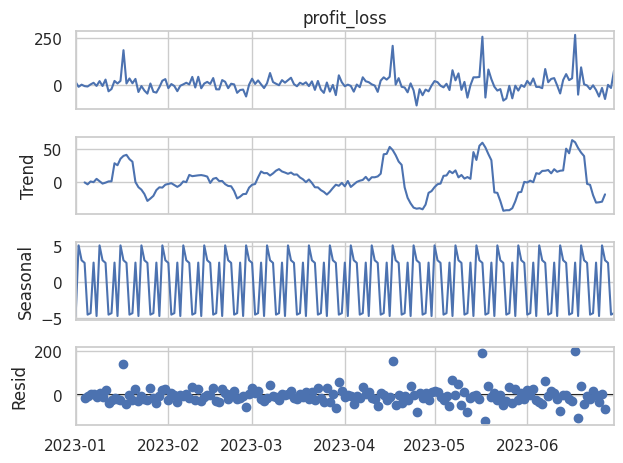

In [35]:
# Aggregate total PnL by day for time series analysis
daily_pnl = df.set_index('transaction_date').resample('D')['profit_loss'].sum()

# Fill missing days with 0 profit_loss
daily_pnl = daily_pnl.fillna(0)

# Time series decomposition
decomposition = sm.tsa.seasonal_decompose(daily_pnl, model='additive')
decomposition.plot()
plt.show()

Plot likely indicates that the data has an upward trend in the long term, but also experiences seasonal fluctuations.

**Making Predictive Model for upcoming Sales and Profit & Loss**

In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,estimated_cost_price,profit_loss,month
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2.696641,0.606717,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2.936993,0.326014,1
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,4.148827,0.702346,1
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2.484959,-0.484959,1
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2.936993,0.326014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2.744731,-0.489462,6
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2.744670,0.510661,6
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2.744731,0.255269,6
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,3.655200,0.094800,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        149116 non-null  int64         
 1   transaction_date      149116 non-null  datetime64[ns]
 2   transaction_time      149116 non-null  object        
 3   transaction_qty       149116 non-null  int64         
 4   store_id              149116 non-null  int64         
 5   store_location        149116 non-null  category      
 6   product_id            149116 non-null  int64         
 7   unit_price            149116 non-null  float64       
 8   product_category      149116 non-null  category      
 9   product_type          149116 non-null  category      
 10  product_detail        149116 non-null  category      
 11  sales                 149116 non-null  float64       
 12  estimated_cost_price  149116 non-null  float64       
 13 

Mean Squared Error (Quantity): 14270.794470967741
Mean Squared Error (Revenue): 123914.90701396237


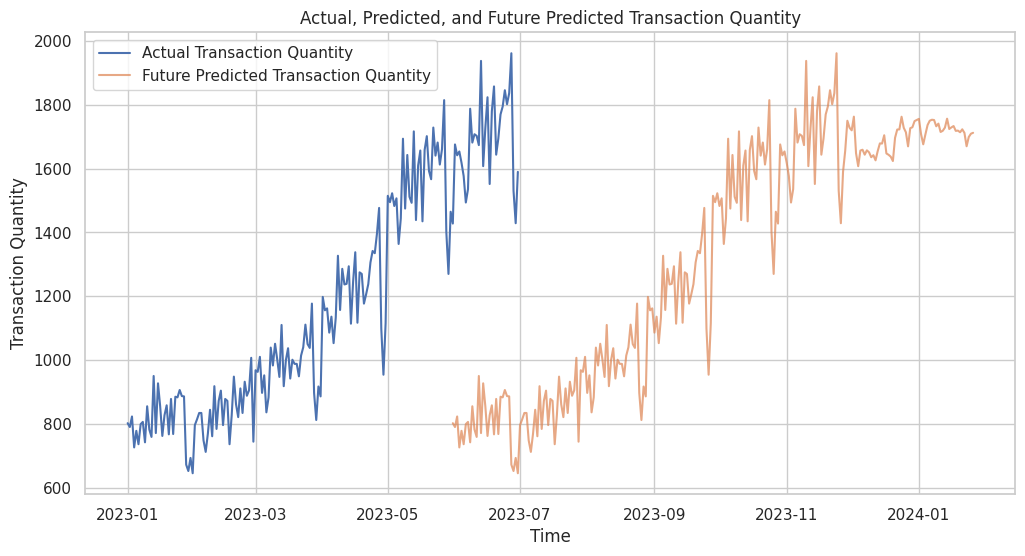

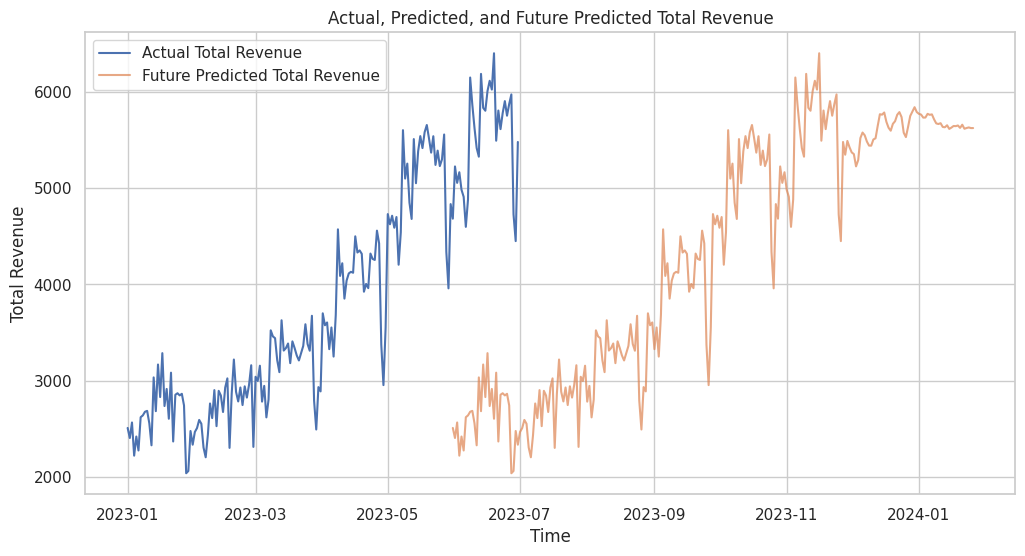

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
rfdf=pd.DataFrame(df)
# Combine 'transaction_date' and 'transaction_time' into a single datetime column
rfdf['transaction_time'] = pd.to_datetime(rfdf['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
rfdf['transaction_datetime'] = pd.to_datetime(rfdf['transaction_date'].astype(str) + ' ' + rfdf['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
rfdf = rfdf.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
rfdf.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
rfdf['total_revenue'] = rfdf['transaction_qty'] * rfdf['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = rfdf[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Random Forest input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Random Forest Regressor for transaction quantity
rf_qty = RandomForestRegressor(n_estimators=100, random_state=42)
rf_qty.fit(X_train_reshaped, y_qty_train)

# Train Random Forest Regressor for total revenue
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred = rf_qty.predict(X_test_reshaped)
y_revenue_pred = rf_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict two months into the future
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))

    # Predict next day's transaction quantity and total revenue
    next_qty = rf_qty.predict(last_sequence_reshaped)[0]
    next_revenue = rf_revenue.predict(last_sequence_reshaped)[0]

    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)

    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
#plt.plot(daily_data.index[-len(y_qty_test_inverse):], y_qty_pred_inverse, label='Predicted Transaction Quantity', alpha=0.7)
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
# plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity_random_forest.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
#plt.plot(daily_data.index[-len(y_revenue_test_inverse):], y_revenue_pred_inverse, label='Predicted Total Revenue', alpha=0.7)
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
# plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue_random_forest.png')
plt.show()

Epoch 1/100
4/4 [==============================] - 6s 328ms/step - loss: 0.2531 - val_loss: 0.1506
Epoch 2/100
4/4 [==============================] - 0s 40ms/step - loss: 0.1006 - val_loss: 0.0330
Epoch 3/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0193 - val_loss: 0.0100
Epoch 4/100
4/4 [==============================] - 0s 46ms/step - loss: 0.0289 - val_loss: 0.0211
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0251 - val_loss: 0.0064
Epoch 6/100
4/4 [==============================] - 0s 48ms/step - loss: 0.0109 - val_loss: 0.0080
Epoch 7/100
4/4 [==============================] - 0s 49ms/step - loss: 0.0119 - val_loss: 0.0121
Epoch 8/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0138 - val_loss: 0.0115
Epoch 9/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0126 - val_loss: 0.0080
Epoch 10/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0101 - val_loss: 0.0059
Epoch 11/100
4/4 [

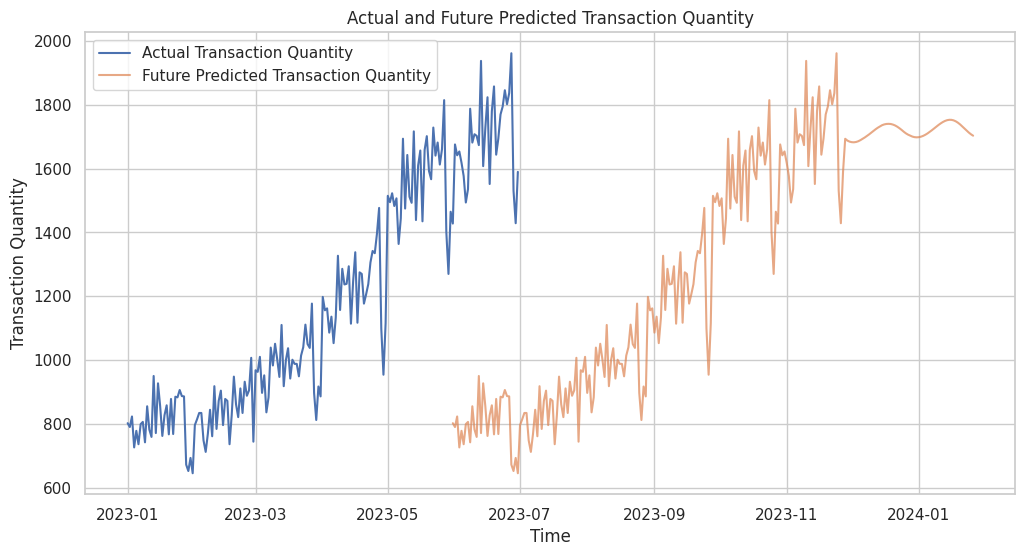

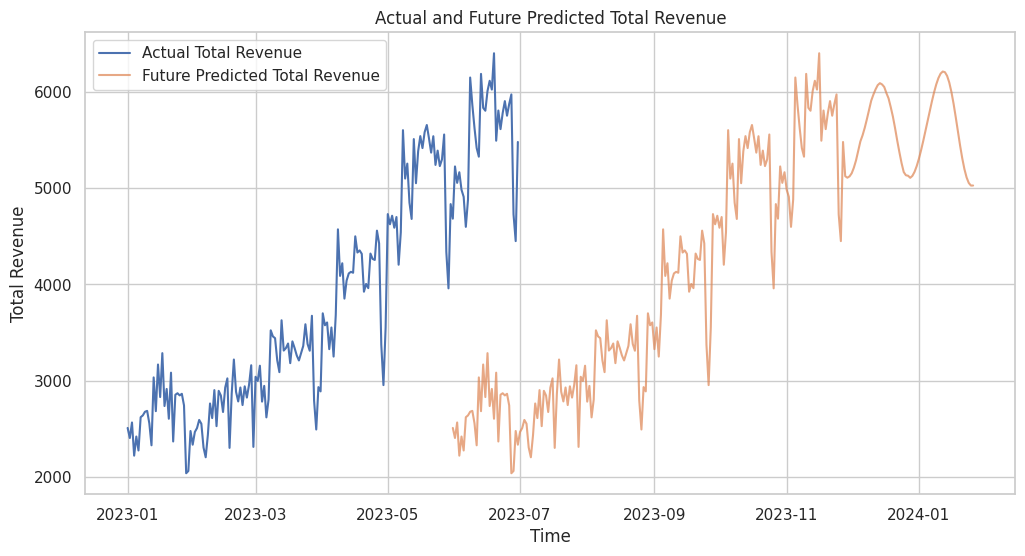

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data and preprocess as before
lstmdf = pd.DataFrame(df)  # Assuming 'data' is your dataset
lstmdf['transaction_time'] = pd.to_datetime(lstmdf['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
lstmdf['transaction_datetime'] = pd.to_datetime(lstmdf['transaction_date'].astype(str) + ' ' + lstmdf['transaction_time'].astype(str), errors='coerce')
lstmdf = lstmdf.dropna(subset=['transaction_datetime'])
lstmdf.set_index('transaction_datetime', inplace=True)
lstmdf['total_revenue'] = lstmdf['transaction_qty'] * lstmdf['unit_price']
daily_data = lstmdf[['transaction_qty', 'total_revenue']].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Prepare data for LSTM
seq_length = 30
X, y_qty, y_revenue = [], [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Define the LSTM model for predicting quantity
model_qty = Sequential()
model_qty.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_qty.add(Dense(1))  # Output layer for quantity prediction
model_qty.compile(optimizer='adam', loss='mse')

# Train the model for quantity prediction
history_qty = model_qty.fit(X_train, y_qty_train, epochs=100, batch_size=32, validation_data=(X_test, y_qty_test), verbose=1)

# Predict using the trained quantity model
y_qty_pred = model_qty.predict(X_test)

# Define the LSTM model for predicting revenue
model_revenue = Sequential()
model_revenue.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_revenue.add(Dense(1))  # Output layer for revenue prediction
model_revenue.compile(optimizer='adam', loss='mse')

# Train the model for revenue prediction
history_revenue = model_revenue.fit(X_train, y_revenue_train, epochs=100, batch_size=32, validation_data=(X_test, y_revenue_test), verbose=1)

# Predict using the trained revenue model
y_revenue_pred = model_revenue.predict(X_test)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred[:,0], np.zeros_like(y_qty_pred[:,0]))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict future values for both quantity and revenue
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, 2))

    # Predict next day's quantity and revenue
    next_qty = model_qty.predict(last_sequence_reshaped)[0, 0]
    next_revenue = model_revenue.predict(last_sequence_reshaped)[0, 0]

    # Append the predictions to the future predictions lists
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)

    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_inverse = scaler.inverse_transform(np.array([future_predictions_qty, future_predictions_revenue]).T)
future_predictions_qty_inverse = future_predictions_inverse[:, 0]
future_predictions_revenue_inverse = future_predictions_inverse[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_8c5wz_/7eqizobc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_8c5wz_/1ng3lp22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55016', 'data', 'file=/tmp/tmpe_8c5wz_/7eqizobc.json', 'init=/tmp/tmpe_8c5wz_/1ng3lp22.json', 'output', 'file=/tmp/tmpe_8c5wz_/prophet_model35oivkml/prophet_model-20240709081232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:12:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Mean Squared Error (Quantity): 56034.54434116035
Root Mean Squared Error (Quantity): 236.71616831378535
Mean Squared Error (Revenue): 718858.8044525619
Root Mean Squared Error (Revenue): 847.8554148276473


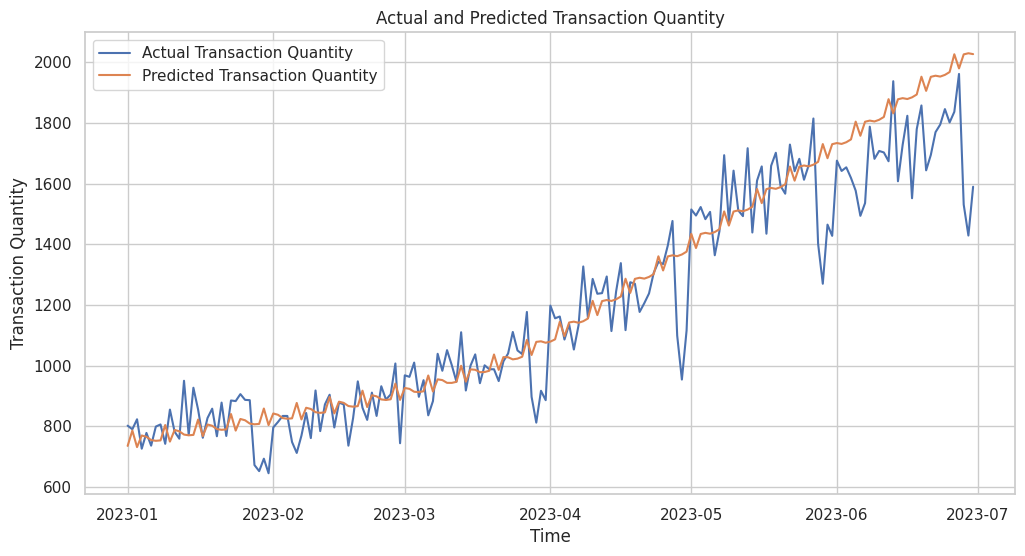

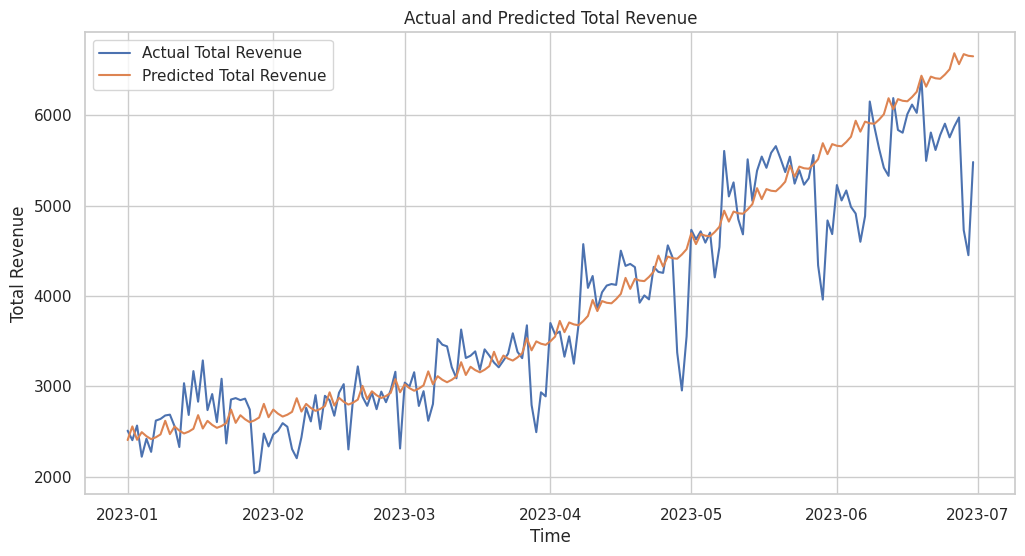

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Load the data and preprocess
pdf = pd.DataFrame(df)  # Assuming 'data' is your dataset
pdf['transaction_time'] = pd.to_datetime(pdf['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
pdf['transaction_datetime'] = pd.to_datetime(pdf['transaction_date'].astype(str) + ' ' + pdf['transaction_time'].astype(str), errors='coerce')
pdf = pdf.dropna(subset=['transaction_datetime'])
pdf.set_index('transaction_datetime', inplace=True)
pdf['total_revenue'] = pdf['transaction_qty'] * pdf['unit_price']
daily_data = pdf[['transaction_qty', 'total_revenue']].resample('D').sum()

# Split the data into training and testing sets
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size]
test_data = daily_data[train_size:]

# Prepare the data for Prophet
prophet_train_qty = train_data.reset_index()[['transaction_datetime', 'transaction_qty']].rename(columns={'transaction_datetime': 'ds', 'transaction_qty': 'y'})
prophet_train_revenue = train_data.reset_index()[['transaction_datetime', 'total_revenue']].rename(columns={'transaction_datetime': 'ds', 'total_revenue': 'y'})

# Initialize and fit the Prophet models
model_qty = Prophet()
model_qty.fit(prophet_train_qty)

model_revenue = Prophet()
model_revenue.fit(prophet_train_revenue)

# Make future predictions
future_dates_qty = model_qty.make_future_dataframe(periods=len(test_data))
forecast_qty = model_qty.predict(future_dates_qty)

future_dates_revenue = model_revenue.make_future_dataframe(periods=len(test_data))
forecast_revenue = model_revenue.predict(future_dates_revenue)

# Extract the predicted values for the test period
forecast_qty_test = forecast_qty.set_index('ds').loc[test_data.index]['yhat']
forecast_revenue_test = forecast_revenue.set_index('ds').loc[test_data.index]['yhat']

# Calculate MSE and RMSE for transaction quantity
mse_qty = mean_squared_error(test_data['transaction_qty'], forecast_qty_test)
rmse_qty = np.sqrt(mse_qty)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')

# Calculate MSE and RMSE for total revenue
mse_revenue = mean_squared_error(test_data['total_revenue'], forecast_revenue_test)
rmse_revenue = np.sqrt(mse_revenue)
print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plot the results for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(forecast_qty['ds'], forecast_qty['yhat'], label='Predicted Transaction Quantity')
plt.title('Actual and Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
# plt.savefig('D:/ Prophet_Transaction_quantity.png')
plt.show()

# Plot the results for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(forecast_revenue['ds'], forecast_revenue['yhat'], label='Predicted Total Revenue')
plt.title('Actual and Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
# plt.savefig('D:/prophet_Total_Revenue.png')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_8c5wz_/h77cruq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_8c5wz_/exxect_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40782', 'data', 'file=/tmp/tmpe_8c5wz_/h77cruq6.json', 'init=/tmp/tmpe_8c5wz_/exxect_3.json', 'output', 'file=/tmp/tmpe_8c5wz_/prophet_model75qxu9kp/prophet_model-20240709081206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Mean Squared Error (Quantity): 56034.54434116035
Root Mean Squared Error (Quantity): 236.71616831378535
Mean Squared Error (Revenue): 718858.8044525619
Root Mean Squared Error (Revenue): 847.8554148276473


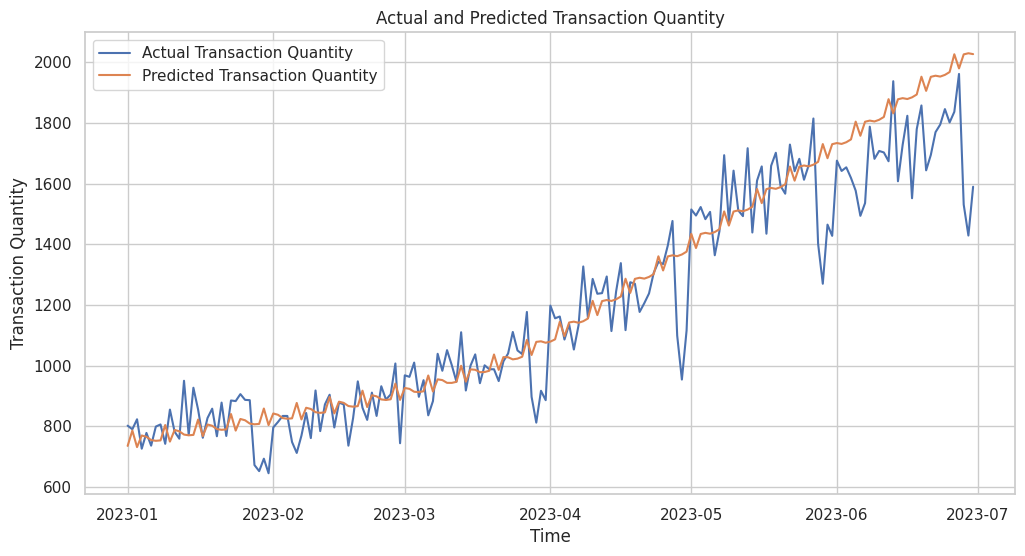

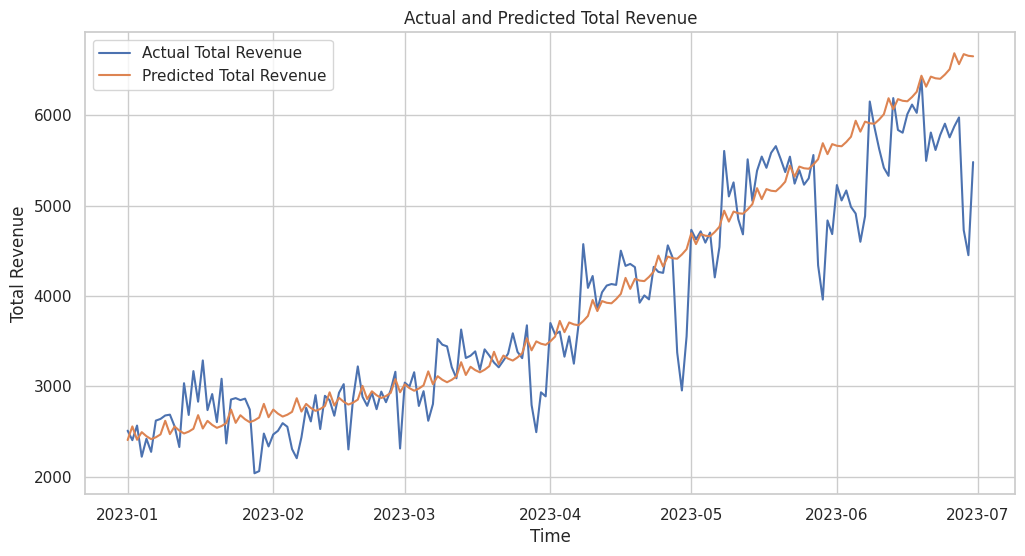

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Load the data and preprocess
pdf = pd.DataFrame(df)  # Assuming 'data' is your dataset
pdf['transaction_time'] = pd.to_datetime(pdf['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
pdf['transaction_datetime'] = pd.to_datetime(pdf['transaction_date'].astype(str) + ' ' + pdf['transaction_time'].astype(str), errors='coerce')
pdf = pdf.dropna(subset=['transaction_datetime'])
pdf.set_index('transaction_datetime', inplace=True)
pdf['total_revenue'] = pdf['transaction_qty'] * pdf['unit_price']
daily_data = pdf[['transaction_qty', 'total_revenue']].resample('D').sum()

holidays = pd.DataFrame({
  'ds': pd.to_datetime(['2023-01-01', '2023-12-25']),
  'holiday': ['New Year\'s Day', 'Christmas Day']
})

# Split the data into training and testing sets
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size]
test_data = daily_data[train_size:]

# Prepare the data for Prophet
prophet_train_qty = train_data.reset_index()[['transaction_datetime', 'transaction_qty']].rename(columns={'transaction_datetime': 'ds', 'transaction_qty': 'y'})
prophet_train_revenue = train_data.reset_index()[['transaction_datetime', 'total_revenue']].rename(columns={'transaction_datetime': 'ds', 'total_revenue': 'y'})

# Initialize and fit the Prophet models
model_qty = Prophet()
model_qty.fit(prophet_train_qty)

model_revenue = Prophet()
model_revenue.fit(prophet_train_revenue)

# Make future predictions
future_dates_qty = model_qty.make_future_dataframe(periods=len(test_data))
forecast_qty = model_qty.predict(future_dates_qty)

future_dates_revenue = model_revenue.make_future_dataframe(periods=len(test_data))
forecast_revenue = model_revenue.predict(future_dates_revenue)

# Extract the predicted values for the test period
forecast_qty_test = forecast_qty.set_index('ds').loc[test_data.index]['yhat']
forecast_revenue_test = forecast_revenue.set_index('ds').loc[test_data.index]['yhat']

# Calculate MSE and RMSE for transaction quantity
mse_qty = mean_squared_error(test_data['transaction_qty'], forecast_qty_test)
rmse_qty = np.sqrt(mse_qty)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')

# Calculate MSE and RMSE for total revenue
mse_revenue = mean_squared_error(test_data['total_revenue'], forecast_revenue_test)
rmse_revenue = np.sqrt(mse_revenue)
print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plot the results for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(forecast_qty['ds'], forecast_qty['yhat'], label='Predicted Transaction Quantity')
plt.title('Actual and Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
# plt.savefig('D:/ Prophet_Transaction_quantity.png')
plt.show()

# Plot the results for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(forecast_revenue['ds'], forecast_revenue['yhat'], label='Predicted Total Revenue')
plt.title('Actual and Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
# plt.savefig('D:/prophet_Total_Revenue.png')
plt.show()

Epoch 1/200
4/4 [==============================] - 3s 296ms/step - loss: 0.0552 - val_loss: 0.0365
Epoch 2/200
4/4 [==============================] - 0s 52ms/step - loss: 0.0287 - val_loss: 0.0143
Epoch 3/200
4/4 [==============================] - 0s 43ms/step - loss: 0.0197 - val_loss: 0.0202
Epoch 4/200
4/4 [==============================] - 0s 38ms/step - loss: 0.0122 - val_loss: 0.0066
Epoch 5/200
4/4 [==============================] - 0s 44ms/step - loss: 0.0127 - val_loss: 0.0078
Epoch 6/200
4/4 [==============================] - 0s 62ms/step - loss: 0.0116 - val_loss: 0.0079
Epoch 7/200
4/4 [==============================] - 0s 41ms/step - loss: 0.0097 - val_loss: 0.0111
Epoch 8/200
4/4 [==============================] - 0s 42ms/step - loss: 0.0097 - val_loss: 0.0067
Epoch 9/200
4/4 [==============================] - 0s 41ms/step - loss: 0.0097 - val_loss: 0.0063
Epoch 10/200
4/4 [==============================] - 0s 43ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 11/200
4/4 [

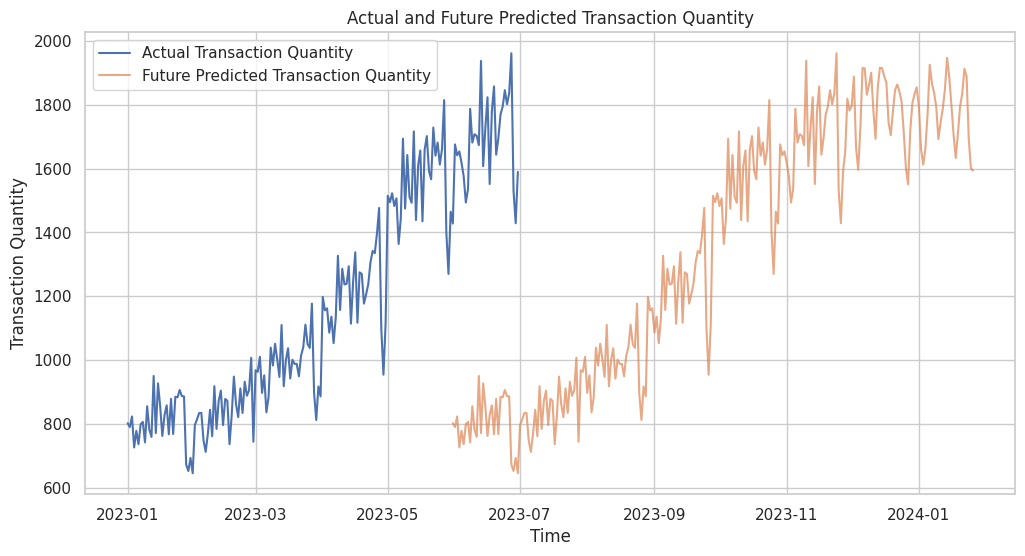

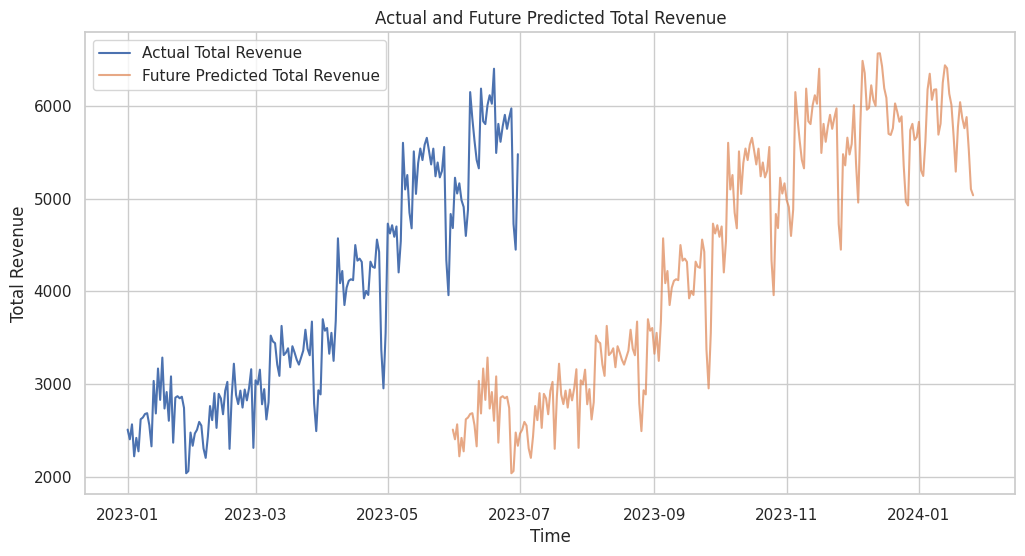

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense

# Load the data and preprocess as before
cnndf = pd.DataFrame(df)  # Assuming 'data' is your dataset
cnndf['transaction_time'] = pd.to_datetime(cnndf['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
cnndf['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + cnndf['transaction_time'].astype(str), errors='coerce')
cnndf = cnndf.dropna(subset=['transaction_datetime'])
cnndf.set_index('transaction_datetime', inplace=True)
cnndf['total_revenue'] = cnndf['transaction_qty'] * cnndf['unit_price']
daily_data = cnndf[['transaction_qty', 'total_revenue']].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Prepare data for ConvLSTM
seq_length = 30
X, y_qty, y_revenue = [], [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Define the ConvLSTM model for predicting quantity
model_qty = Sequential()
model_qty.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model_qty.add(MaxPooling1D(pool_size=2))
model_qty.add(Flatten())
model_qty.add(Dense(50, activation='relu'))
model_qty.add(Dense(1))  # Output layer for quantity prediction
model_qty.compile(optimizer='adam', loss='mse')

# Train the model for quantity prediction
history_qty = model_qty.fit(X_train, y_qty_train, epochs=200, batch_size=32, validation_data=(X_test, y_qty_test), verbose=1)

# Predict using the trained quantity model
y_qty_pred = model_qty.predict(X_test)

# Define the ConvLSTM model for predicting revenue
model_revenue = Sequential()
model_revenue.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model_revenue.add(MaxPooling1D(pool_size=2))
model_revenue.add(Flatten())
model_revenue.add(Dense(50, activation='relu'))
model_revenue.add(Dense(1))  # Output layer for revenue prediction
model_revenue.compile(optimizer='adam', loss='mse')

# Train the model for revenue prediction
history_revenue = model_revenue.fit(X_train, y_revenue_train, epochs=200, batch_size=32, validation_data=(X_test, y_revenue_test), verbose=1)

# Predict using the trained revenue model
y_revenue_pred = model_revenue.predict(X_test)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred[:, 0], np.zeros_like(y_qty_pred[:, 0]))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict future values for both quantity and revenue
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, 2))

    # Predict next day's quantity and revenue
    next_qty = model_qty.predict(last_sequence_reshaped)[0, 0]
    next_revenue = model_revenue.predict(last_sequence_reshaped)[0, 0]

    # Append the predictions to the future predictions lists
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)

    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_inverse = scaler.inverse_transform(np.array([future_predictions_qty, future_predictions_revenue]).T)
future_predictions_qty_inverse = future_predictions_inverse[:, 0]
future_predictions_revenue_inverse = future_predictions_inverse[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
# plt.savefig('D:/Conv1D_Total_Quantity.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
# plt.savefig('D:/Conv1D_Total_Revenue.png')
plt.show()

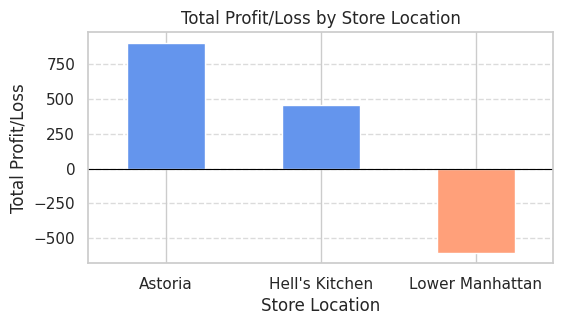

In [ ]:
# Group by store location and calculate total profit/loss
profit_loss_by_location = df.groupby('store_location')['profit_loss'].sum()

# Sort the profit/loss values in descending order
profit_loss_by_location = profit_loss_by_location.sort_values(ascending=False)

# Define colors based on profit/loss values
colors = ['cornflowerblue' if value > 0 else 'lightsalmon' for value in profit_loss_by_location]

# Create a bar chart
plt.figure(figsize=(6, 3))
profit_loss_by_location.plot(kind='bar', color=colors)
plt.title('Total Profit/Loss by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Profit/Loss')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


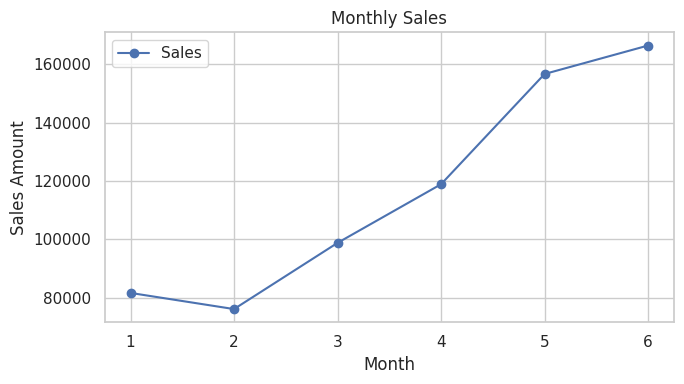

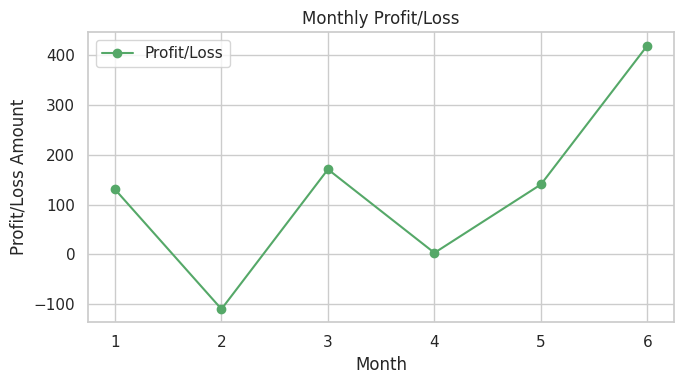

In [ ]:
# Extract month from transaction_date
df['month'] = df['transaction_date'].dt.month

# Aggregate sales and profit_loss by month
monthly_data = df.groupby('month').agg({'sales': 'sum', 'profit_loss': 'sum'}).reset_index()

# Plotting Sales
plt.figure(figsize=(7, 4))
plt.plot(monthly_data['month'], monthly_data['sales'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
# plt.xticks(monthly_data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Profit/Loss
plt.figure(figsize=(7, 4))
plt.plot(monthly_data['month'], monthly_data['profit_loss'], marker='o', linestyle='-', color='g', label='Profit/Loss')
plt.title('Monthly Profit/Loss')
plt.xlabel('Month')
plt.ylabel('Profit/Loss Amount')
# plt.xticks(monthly_data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


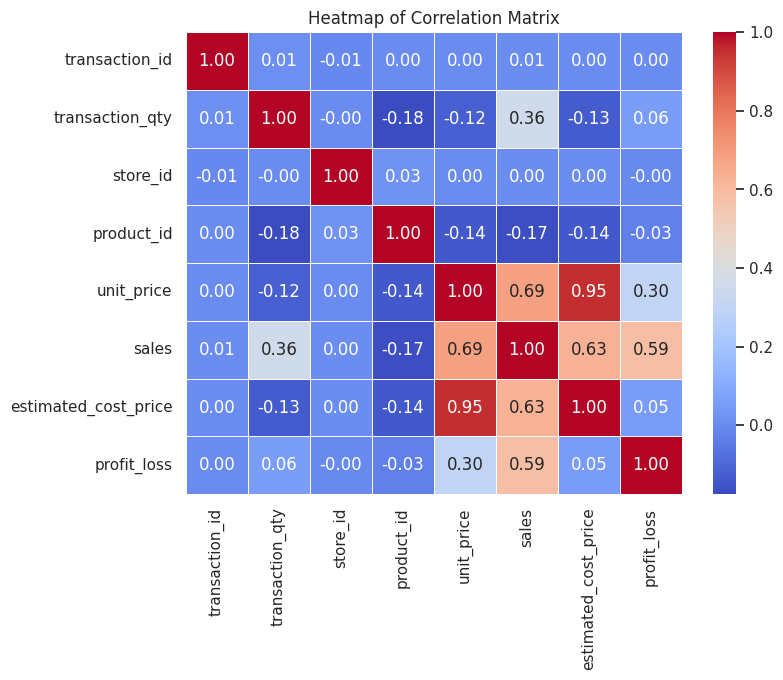

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix for numeric columns only
corr_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,estimated_cost_price,profit_loss,month
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2.696641,0.606717,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2.936993,0.326014,1
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,4.148827,0.702346,1
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2.484959,-0.484959,1
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2.936993,0.326014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2.744731,-0.489462,6
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2.744670,0.510661,6
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2.744731,0.255269,6
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,3.655200,0.094800,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        149116 non-null  int64         
 1   transaction_date      149116 non-null  datetime64[ns]
 2   transaction_time      149116 non-null  object        
 3   transaction_qty       149116 non-null  int64         
 4   store_id              149116 non-null  int64         
 5   store_location        149116 non-null  category      
 6   product_id            149116 non-null  int64         
 7   unit_price            149116 non-null  float64       
 8   product_category      149116 non-null  category      
 9   product_type          149116 non-null  category      
 10  product_detail        149116 non-null  category      
 11  sales                 149116 non-null  float64       
 12  estimated_cost_price  149116 non-null  float64       
 13 

 transaction_id        149116 non-null  int64         
 1   transaction_date      149116 non-null  datetime64[ns]
 2   transaction_time      149116 non-null  object        
 3   transaction_qty       149116 non-null  int64         
 4   store_id              149116 non-null  int64         
 5   store_location        149116 non-null  category      
 6   product_id            149116 non-null  int64         
 7   unit_price            149116 non-null  float64       
 8   product_category      149116 non-null  category      
 9   product_type          149116 non-null  category      
 10  product_detail        149116 non-null  category      
 11  sales                 149116 non-null  float64       
 12  estimated_cost_price  149116 non-null  float64       
 13  profit_loss           149116 non-null  float64       
 14  month                 149116 non-null  int32  

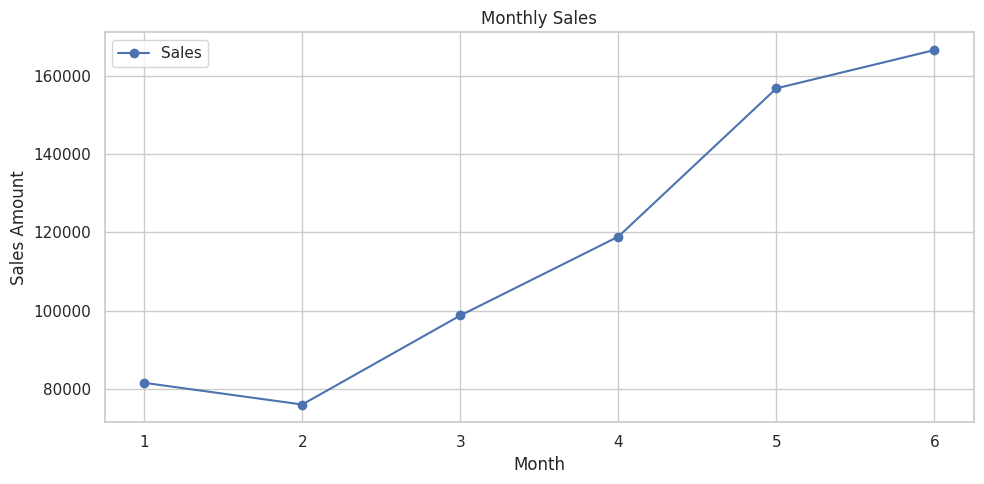

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Aggregating sales data by month
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

# Plotting the monthly sales
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'], monthly_sales['sales'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(monthly_sales['month'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
